## Data Exploration 

**Objective:** Load data from competition using time series from walmart. 
**Dataset:** The M5 Walmart dataset comes from the Kaggle competition “M5 Forecasting – Accuracy”, which focuses on hierarchical time-series forecasting in a large-scale retail setting. The data represent daily unit sales for Walmart products across the United States over several years, enriched with calendar events and pricing information.

The dataset is designed to reflect real-world forecasting challenges, including:
	•	thousands of related time series
	•	multiple aggregation levels
	•	promotions and holidays
	•	non-stationary demand patterns
	•	strong cross-sectional heterogeneity

**Dataset Objective:** The objective of the competition is to forecast the next 28 days of sales for all item–store combinations while ensuring coherent predictions across hierarchical levels, evaluated using the Weighted Root Mean Squared Scaled Error (WRMSSE) metric.

In [1]:
# Import Libraries
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split

# Define file paths
data_dir = '../data/'
zip_file_path = os.path.join(data_dir, 'raw', 'm5-forecasting-accuracy.zip')
extracted_dir = os.path.join(data_dir, 'raw', 'dataset')
preprocessed_dir = os.path.join(data_dir, 'proc')
os.makedirs(extracted_dir, exist_ok=True)
os.makedirs(preprocessed_dir, exist_ok=True)

# Function to unzip files
def zipextract(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)        

# Unzip dataset
zipextract(zip_file_path, extracted_dir)

In [2]:
# Open csv files with pandas
sales = pd.read_csv(os.path.join(extracted_dir, 'sales_train_evaluation.csv'))
calendar = pd.read_csv(os.path.join(extracted_dir, 'calendar.csv'))
prices = pd.read_csv(os.path.join(extracted_dir, 'sell_prices.csv'))


In [3]:
# Check Shape, first rows, nulls and datatypes
print("Sales Data Shape:", sales.shape)
print(sales.head())
print("Nulls in Sales Data:\n", sales.isnull().sum())
print("Sales Data Types:\n", sales.dtypes)

Sales Data Shape: (30490, 1947)
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d

In [4]:
# Calendar Check Shape, first rows, nulls and datatypes
print("Calendar Data Shape:", calendar.shape)
print(calendar.head())
print("Nulls in calendar Data:\n", calendar.isnull().sum())
print("Calendar Data Types:\n", calendar.dtypes)

Calendar Data Shape: (1969, 14)
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  
Nulls in calendar Data:
 date               0
wm_yr_wk           0
weekday            0
wday     

# Pre-analysis: Missing Values, Outliers, Visualizations

Analysis of the type of data and potential information to be removed

In [5]:
# Handle missing values if any (example)
# print(sales.isnull().any().any()) # False
# print(prices.isnull().any().any()) # False
# print(calendar.isnull().any().any()) # True

missing_event_name = calendar[calendar['event_name_1'].isnull()]
#print(f"Rows with missing event_name_1: {len(missing_event_name)}")
#missing_event_name.head(10)

missing_event_type = calendar[calendar['event_type_1'].isnull()]
#missing_event_type.head(10)

calendar[['event_name_1', 'event_type_1']].isnull().sum()
calendar[calendar['event_type_1'].notna()]
calendar0 = calendar

# Fill in with No Event
calendar['event_name_1'].fillna('No Event', inplace = True)
calendar['event_type_1'].fillna('No Event', inplace = True)
calendar['event_name_2'].fillna('No Event', inplace = True)
calendar['event_type_2'].fillna('No Event', inplace = True)


/var/folders/n9/7h_0tmx15jj1srfspnp75fvw0000gn/T/ipykernel_98027/4072562356.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['event_name_1'].fillna('No Event', inplace = True)
/var/folders/n9/7h_0tmx15jj1srfspnp75fvw0000gn/T/ipykernel_98027/4072562356.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

### Missing Values

Four Variables with Missing values event_name_1, event_name_2, event_type_1, event_type_2. Each of these represent a specific date event for which a date in the calendar can show up to two events. But since most of the dates do not have any events from a holiday perspective most are empty. For these is better to keep a consistent date such as 'No Event', this is because these missing can't be replaced with arbitrary values from other holidays as these are not extrapolable. 


# Outliers

Check for values that are anomalous. 


⚠️ SUSPICIOUS: FOODS_3_180_CA_1_evaluation has 282 outliers (14.5%)
⚠️ SUSPICIOUS: FOODS_3_409_CA_3_evaluation has 232 outliers (12.0%)
⚠️ SUSPICIOUS: FOODS_1_097_CA_2_evaluation has 254 outliers (13.1%)
⚠️ SUSPICIOUS: HOBBIES_1_272_TX_2_evaluation has 98 outliers (5.0%)
⚠️ SUSPICIOUS: HOUSEHOLD_1_064_CA_4_evaluation has 171 outliers (8.8%)


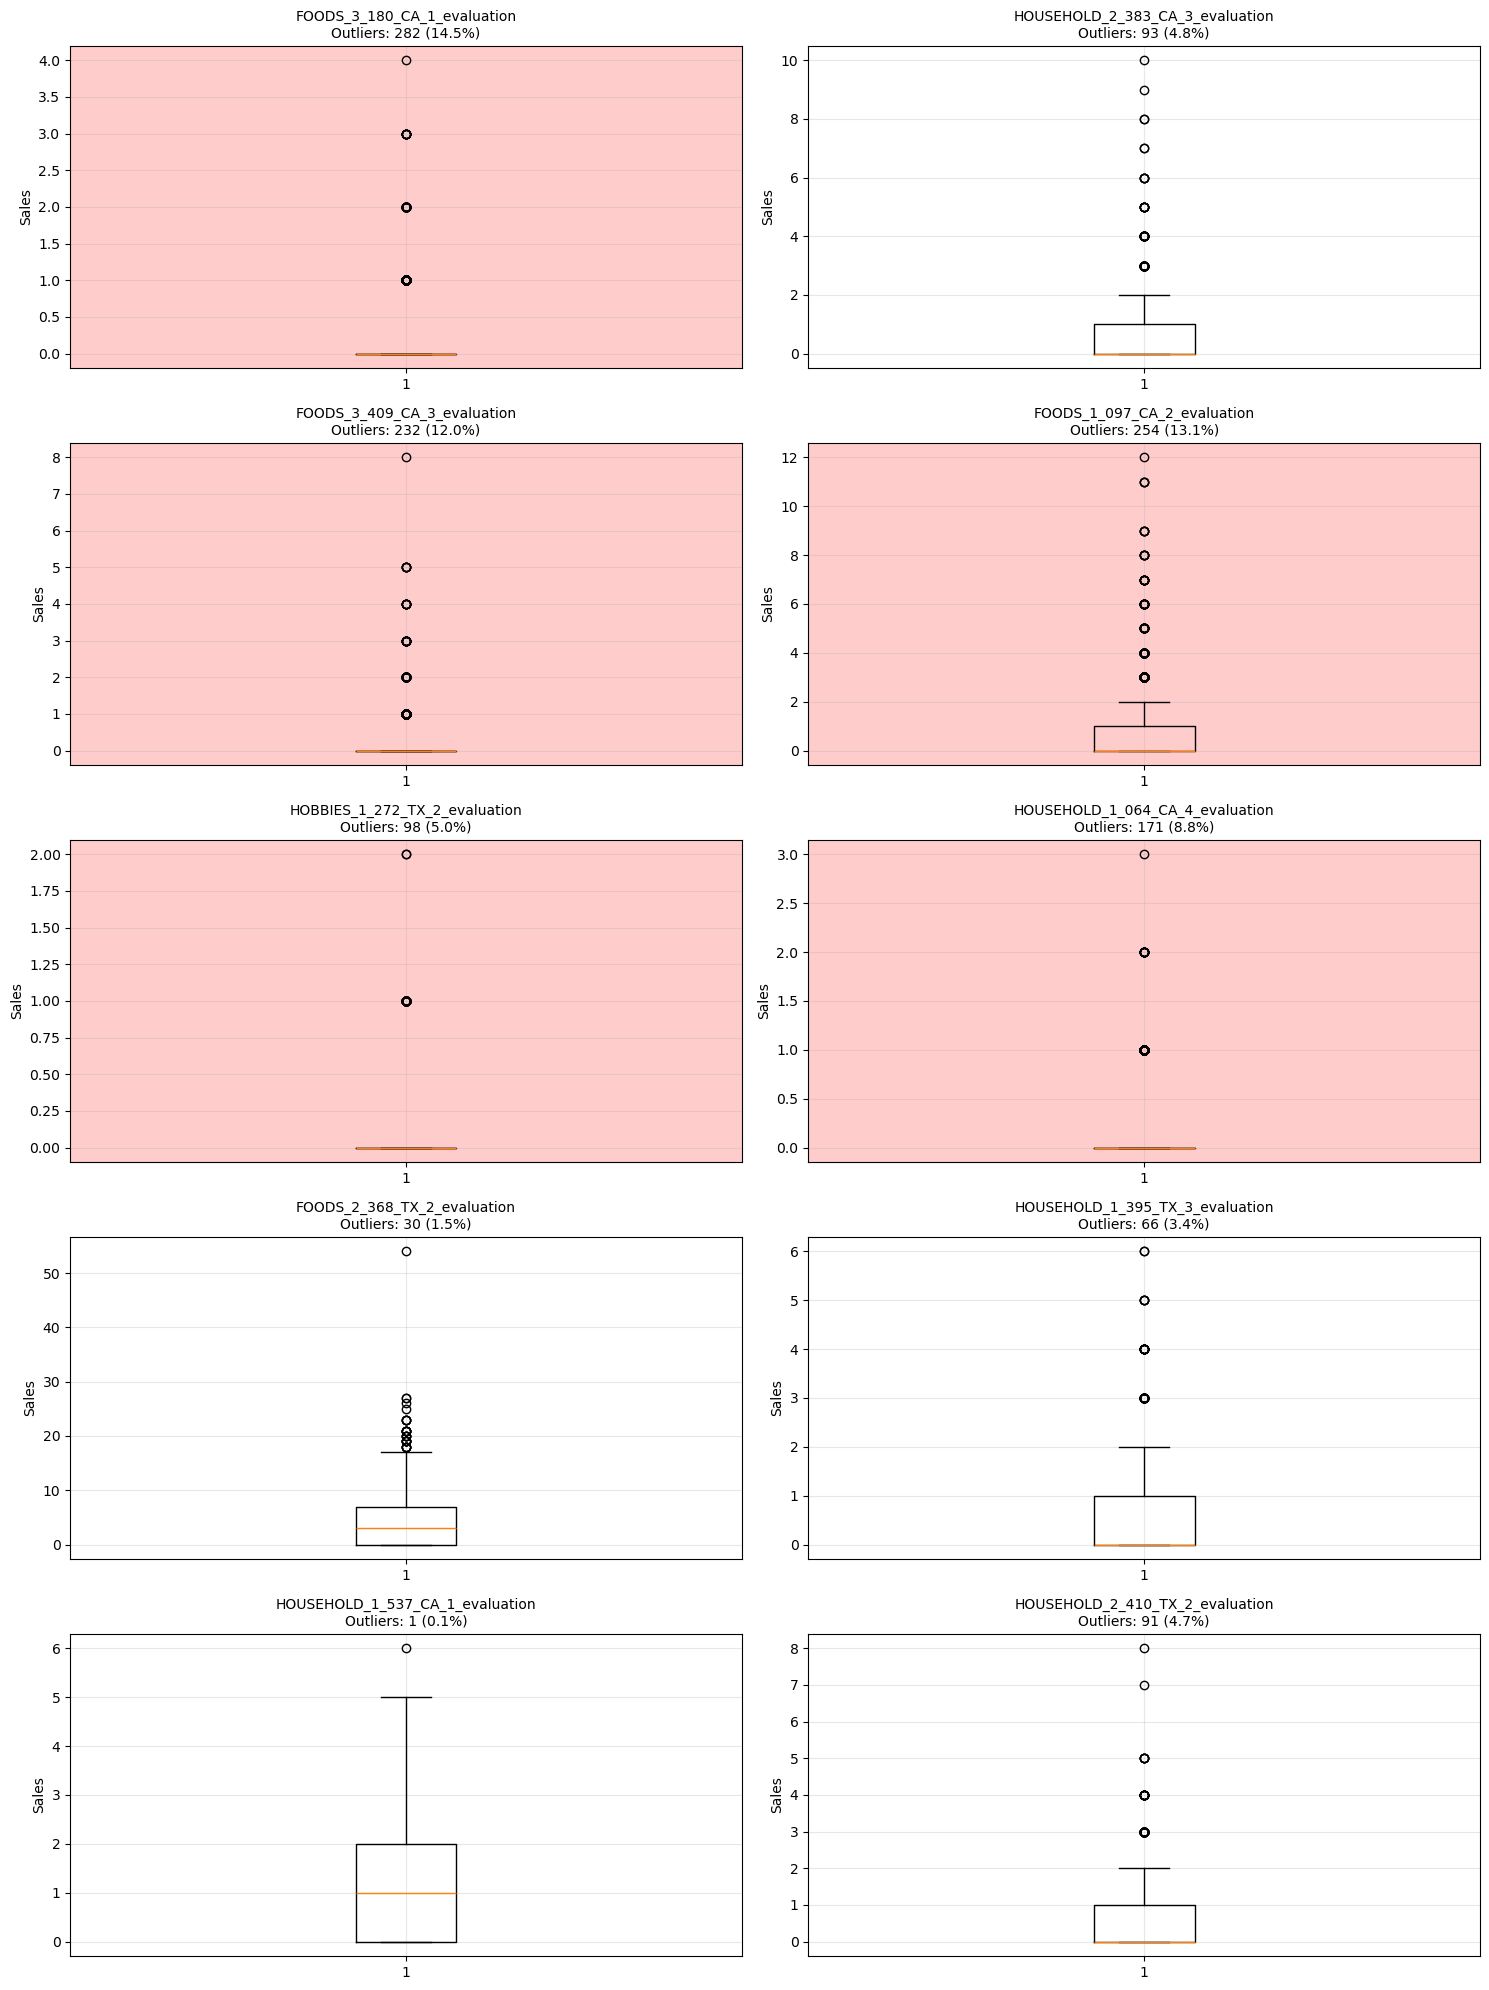

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select 10 random products to analyze
sample_products = sales['id'].sample(10, random_state=42).tolist()

# Get sales columns (d_1 to d_1941)
sales_cols = [col for col in sales.columns if col.startswith('d_')]

# Create figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

# For each sample product, create boxplot and identify outliers
for idx, product_id in enumerate(sample_products):
    # Get sales data for this product
    product_sales = sales[sales['id'] == product_id][sales_cols].values.flatten()
    
    # Calculate IQR and outliers
    Q1 = np.percentile(product_sales, 25)
    Q3 = np.percentile(product_sales, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = product_sales[(product_sales < lower_bound) | (product_sales > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(product_sales)) * 100
    
    # Create boxplot
    axes[idx].boxplot(product_sales, vert=True)
    axes[idx].set_title(f'{product_id}\nOutliers: {outlier_count} ({outlier_pct:.1f}%)', fontsize=10)
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)
    
    # Flag suspicious products (e.g., >5% outliers)
    if outlier_pct > 5:
        axes[idx].set_facecolor('#ffcccc')  # Light red background
        print(f"⚠️ SUSPICIOUS: {product_id} has {outlier_count} outliers ({outlier_pct:.1f}%)")

plt.tight_layout()
plt.show()

# Time Series Plots

Create time series plots for products of different patterns (stable, seasonal, trending)

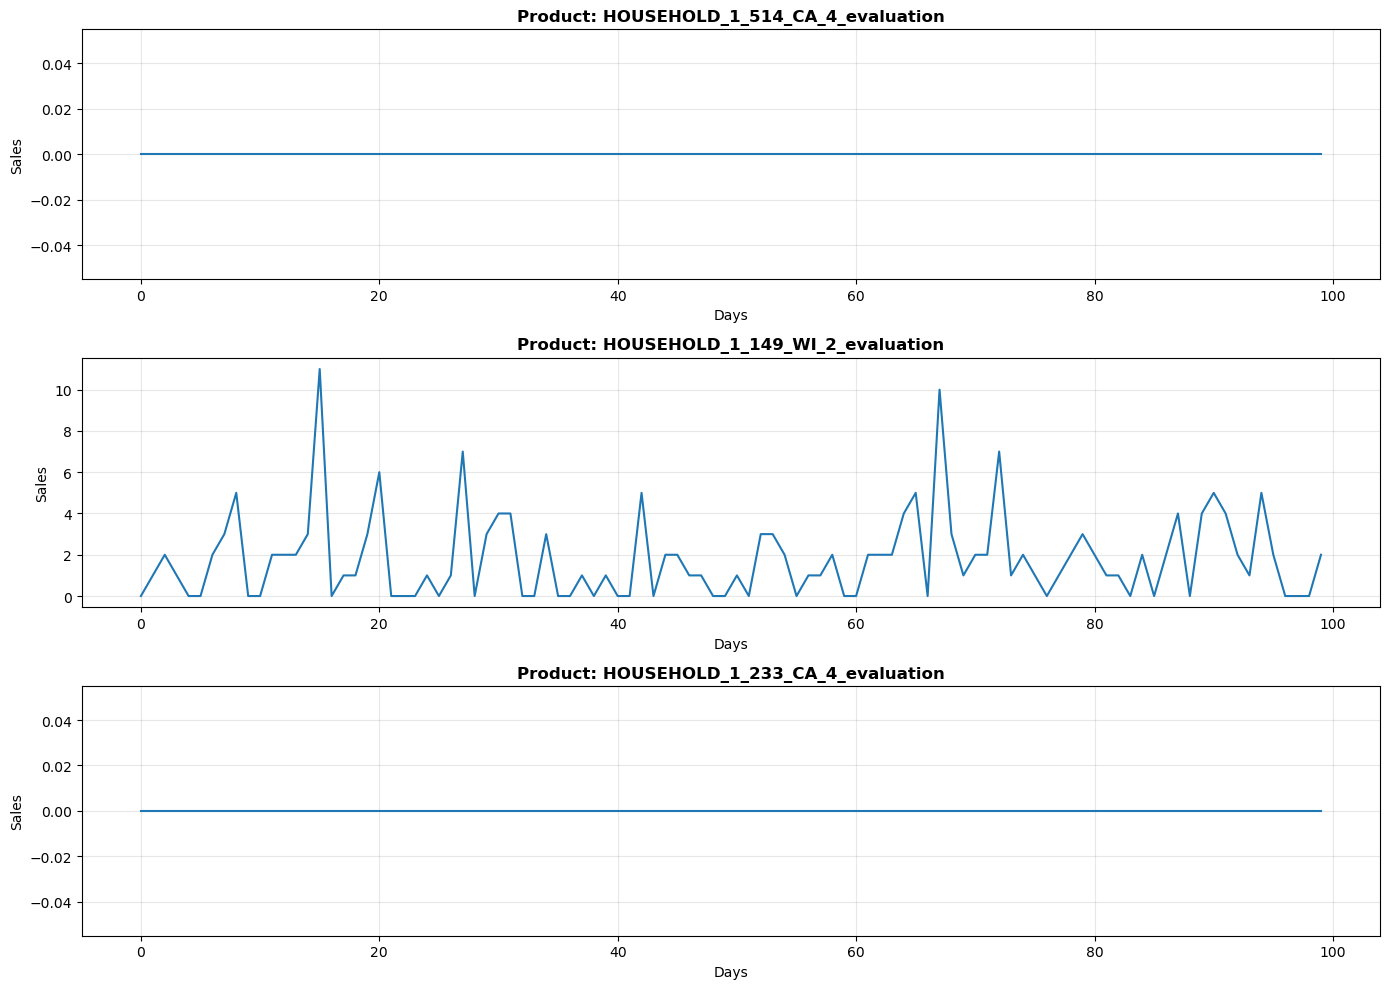

Tested with 3 products and 100 days
Test products: ['HOUSEHOLD_1_514_CA_4_evaluation', 'HOUSEHOLD_1_149_WI_2_evaluation', 'HOUSEHOLD_1_233_CA_4_evaluation']


In [7]:
# First, let's test with a small sample of products and time periods
# Sample only first 100 days to test the code quickly
sample_days = 100
sales_cols = [col for col in sales.columns if col.startswith('d_')][:sample_days]

# Select 3 random products to start
test_products = sales['id'].sample(3, random_state=123).tolist()

# Create test plot
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, product_id in enumerate(test_products):
    # Get sales data for this product
    product_sales = sales[sales['id'] == product_id][sales_cols].values.flatten()
    
    # Plot time series
    axes[idx].plot(range(len(product_sales)), product_sales, linewidth=1.5)
    axes[idx].set_title(f'Product: {product_id}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Days')
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Tested with {len(test_products)} products and {sample_days} days")
print(f"Test products: {test_products}")

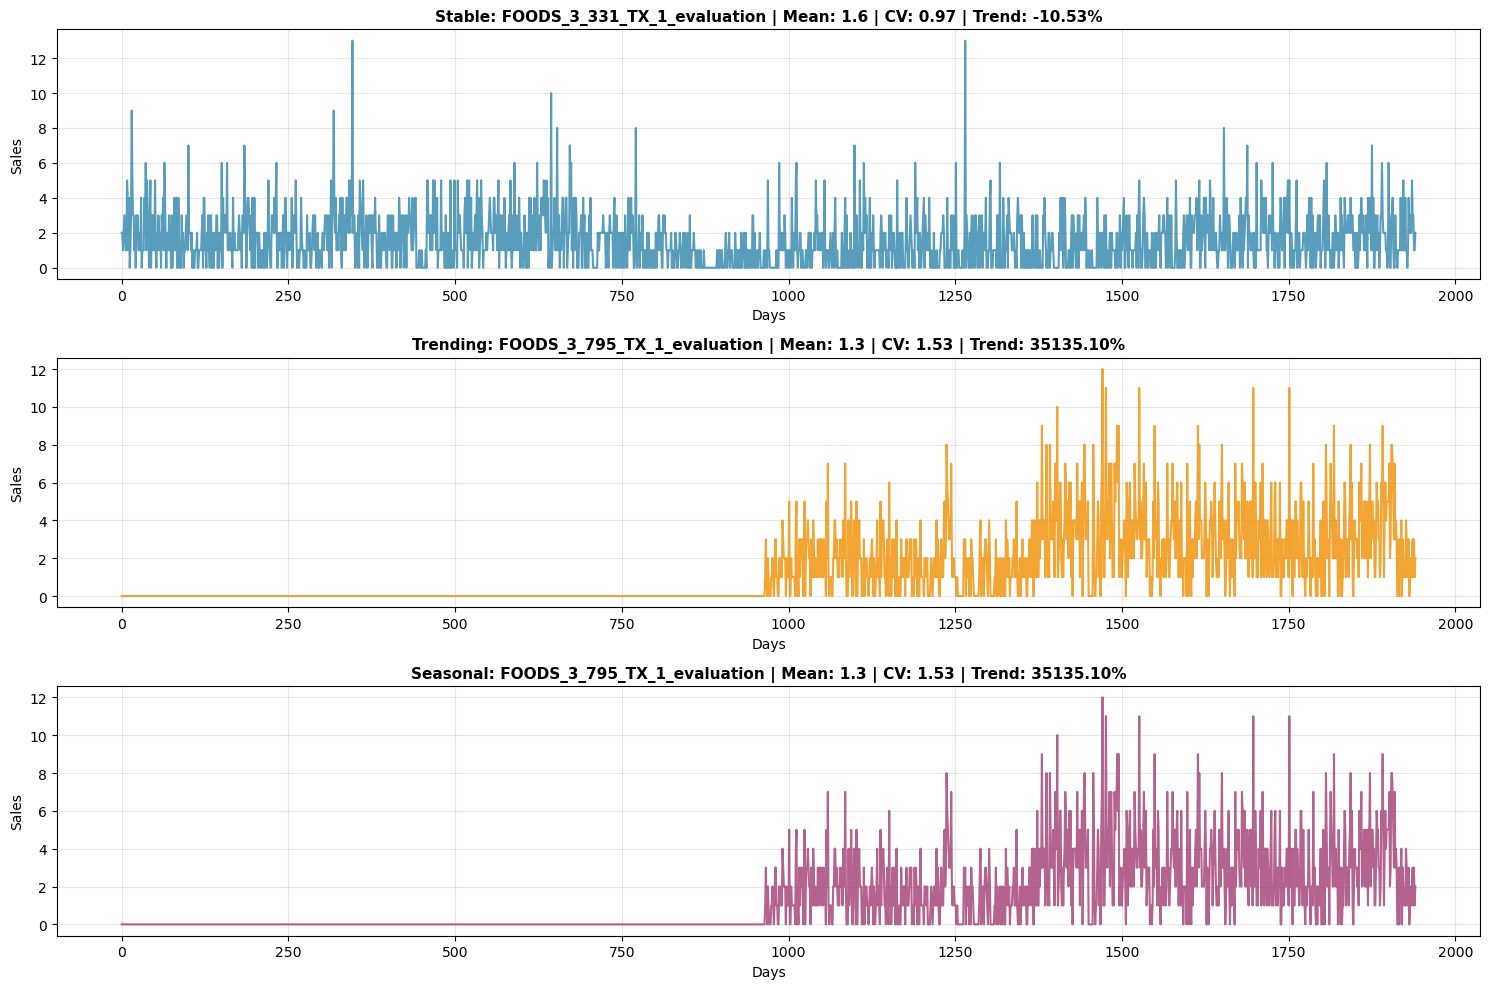

✅ Plotted 3 products with different patterns


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get all sales columns
sales_cols = [col for col in sales.columns if col.startswith('d_')]

# Sample products and calculate simple metrics
sample_size = 100
sample_sales = sales.sample(sample_size, random_state=42)

products_list = []
for idx, row in sample_sales.iterrows():
    product_sales = row[sales_cols].values
    mean_sales = np.mean(product_sales)
    
    if mean_sales > 1:  # Filter low-selling products
        std_sales = np.std(product_sales)
        cv = std_sales / mean_sales  # Coefficient of variation
        
        # Simple trend: compare first half vs second half
        half = len(product_sales) // 2
        first_half_mean = np.mean(product_sales[:half])
        second_half_mean = np.mean(product_sales[half:])
        trend = (second_half_mean - first_half_mean) / first_half_mean if first_half_mean > 0 else 0
        
        products_list.append({
            'id': row['id'],
            'cv': cv,
            'trend': trend,
            'mean': mean_sales
        })

# Sort and pick products
products_list.sort(key=lambda x: x['cv'])
stable = products_list[0]  # Lowest CV

products_list.sort(key=lambda x: abs(x['trend']), reverse=True)
trending = products_list[0]  # Highest trend

products_list.sort(key=lambda x: x['cv'], reverse=True)
seasonal = [p for p in products_list if p['cv'] > 1.0][0] if any(p['cv'] > 1.0 for p in products_list) else products_list[0]

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
selected = [
    ('Stable', stable, '#2E86AB'),
    ('Trending', trending, '#F18F01'),
    ('Seasonal', seasonal, '#A23B72')
]

for idx, (label, product, color) in enumerate(selected):
    product_sales = sales[sales['id'] == product['id']][sales_cols].values.flatten()
    
    axes[idx].plot(product_sales, linewidth=1.5, color=color, alpha=0.8)
    axes[idx].set_title(f'{label}: {product["id"]} | Mean: {product["mean"]:.1f} | CV: {product["cv"]:.2f} | Trend: {product["trend"]:.2%}', 
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Days')
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✅ Plotted 3 products with different patterns")

# Feature Engineering

Lag Features (t-1, t-7, t-14, t-28) and Rolling Statistics (7-day moving average, 28-day moving average)
Seasonality indicators - day of week, month, is_weekend, is_holiday

## Why Long Format for Feature Engineering?

**Approach: Melt → Merge → GroupBy Transform**

The M5 dataset comes in **wide format** (each day is a column), but for time series feature engineering, **long format** is superior:

### Advantages of Long Format:
1. **Easy calendar merge** - Join with calendar DataFrame to get date-based features
2. **Natural GroupBy operations** - Use `groupby('id').shift()` for lags, `groupby('id').rolling()` for moving averages
3. **Standard ML format** - Most libraries expect one observation per row
4. **Easier filtering** - Filter by date ranges, products, stores naturally
5. **Clear data lineage** - Each row represents one product-store-day observation

### Process:
1. `melt()` - Convert wide to long (d_1...d_1941 columns → rows with 'd' and 'sales' columns)
2. `merge()` - Join with calendar to get dates and events
3. `groupby().shift()` - Create lag features per product
4. `groupby().transform(rolling())` - Create moving averages per product
5. Extract seasonality from date column

### Alternative (NOT recommended):
Working row-wise in wide format would require:
- Complex numpy operations on each row
- Hard to merge calendar data
- Difficult to validate and debug
- Cannot leverage pandas time series functionality

In [75]:
# Step 1: Melt sales data to long format
# Get day columns
day_cols = [col for col in sales.columns if col.startswith('d_')]

# Melt to long format (this will create ~59M rows: 30,490 products × 1,941 days)
print("Melting sales data to long format...")
sales_long = sales.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    value_vars=day_cols,
    var_name='d',
    value_name='sales'
)

print(f"Sales long format shape: {sales_long.shape}")
print(sales_long.head())

Melting sales data to long format...
Sales long format shape: (59181090, 8)
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


In [76]:
# Step 2: Merge with calendar to get date features
print("Merging with calendar data...")
sales_long = sales_long.merge(calendar, on='d', how='left')

# Convert date to datetime for easier feature extraction
sales_long['date'] = pd.to_datetime(sales_long['date'])

print(f"\nMerged data shape: {sales_long.shape}")
print(f"Columns: {sales_long.columns.tolist()}")
print(f"\n{sales_long.head()}")

Merging with calendar data...

Merged data shape: (59181090, 21)
Columns: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI']

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales       date  wm_yr_wk  ... wday  month  year  \
0       CA  d_1      0 2011-01-29     11101  ...    1      1  2011   
1       CA  d_1      0 2011-01-29     11101  ...    1      1  2011   
2   

In [77]:
# Step 3: Create Lag Features using GroupBy + Shift
# Group by each product-store combination and shift
print("Creating lag features...")

# Sort by id and date to ensure correct order
sales_long = sales_long.sort_values(['id', 'date'])

# Create lag features (t-1, t-7, t-14, t-28)
for lag in [1, 7, 14, 28]:
    sales_long[f'sales_lag_{lag}'] = sales_long.groupby('id')['sales'].shift(lag)

print(f"Lag features created: sales_lag_1, sales_lag_7, sales_lag_14, sales_lag_28")
print(f"\n{sales_long[['id', 'date', 'sales', 'sales_lag_1', 'sales_lag_7', 'sales_lag_28']].head(30)}")

Creating lag features...
Lag features created: sales_lag_1, sales_lag_7, sales_lag_14, sales_lag_28

                                 id       date  sales  sales_lag_1  \
1612    FOODS_1_001_CA_1_evaluation 2011-01-29      3          NaN   
32102   FOODS_1_001_CA_1_evaluation 2011-01-30      0          3.0   
62592   FOODS_1_001_CA_1_evaluation 2011-01-31      0          0.0   
93082   FOODS_1_001_CA_1_evaluation 2011-02-01      1          0.0   
123572  FOODS_1_001_CA_1_evaluation 2011-02-02      4          1.0   
154062  FOODS_1_001_CA_1_evaluation 2011-02-03      2          4.0   
184552  FOODS_1_001_CA_1_evaluation 2011-02-04      0          2.0   
215042  FOODS_1_001_CA_1_evaluation 2011-02-05      2          0.0   
245532  FOODS_1_001_CA_1_evaluation 2011-02-06      0          2.0   
276022  FOODS_1_001_CA_1_evaluation 2011-02-07      0          0.0   
306512  FOODS_1_001_CA_1_evaluation 2011-02-08      0          0.0   
337002  FOODS_1_001_CA_1_evaluation 2011-02-09      0      

In [78]:
# Step 4: Create Rolling Statistics (7-day and 28-day moving averages)
print("Creating rolling statistics...")

# Rolling mean (exclude current value by using shift(1) before rolling)
sales_long['rolling_mean_7'] = sales_long.groupby('id')['sales'].transform(
    lambda x: x.shift(1).rolling(window=7, min_periods=1).mean()
)

sales_long['rolling_mean_28'] = sales_long.groupby('id')['sales'].transform(
    lambda x: x.shift(1).rolling(window=28, min_periods=1).mean()
)

# Optional: Rolling std for variability
sales_long['rolling_std_7'] = sales_long.groupby('id')['sales'].transform(
    lambda x: x.shift(1).rolling(window=7, min_periods=1).std()
)

print(f"Rolling features created: rolling_mean_7, rolling_mean_28, rolling_std_7")
print(f"\n{sales_long[['id', 'date', 'sales', 'rolling_mean_7', 'rolling_mean_28']].head(30)}")

Creating rolling statistics...
Rolling features created: rolling_mean_7, rolling_mean_28, rolling_std_7

                                 id       date  sales  rolling_mean_7  \
1612    FOODS_1_001_CA_1_evaluation 2011-01-29      3             NaN   
32102   FOODS_1_001_CA_1_evaluation 2011-01-30      0        3.000000   
62592   FOODS_1_001_CA_1_evaluation 2011-01-31      0        1.500000   
93082   FOODS_1_001_CA_1_evaluation 2011-02-01      1        1.000000   
123572  FOODS_1_001_CA_1_evaluation 2011-02-02      4        1.000000   
154062  FOODS_1_001_CA_1_evaluation 2011-02-03      2        1.600000   
184552  FOODS_1_001_CA_1_evaluation 2011-02-04      0        1.666667   
215042  FOODS_1_001_CA_1_evaluation 2011-02-05      2        1.428571   
245532  FOODS_1_001_CA_1_evaluation 2011-02-06      0        1.285714   
276022  FOODS_1_001_CA_1_evaluation 2011-02-07      0        1.285714   
306512  FOODS_1_001_CA_1_evaluation 2011-02-08      0        1.285714   
337002  FOODS_1_001

In [79]:
# Step 5: Create Seasonality Features from date
print("Creating seasonality features...")

# Day of week (0=Monday, 6=Sunday)
sales_long['day_of_week'] = sales_long['date'].dt.dayofweek
sales_long['day_name'] = sales_long['date'].dt.day_name()

# Month
sales_long['month'] = sales_long['date'].dt.month

# Is weekend
sales_long['is_weekend'] = (sales_long['day_of_week'] >= 5).astype(int)

# Is holiday (from calendar data - event_type_1 or event_type_2 not 'No Event')
sales_long['is_holiday'] = (
    ((sales_long['event_type_1'] != 'No Event') | 
     (sales_long['event_type_2'] != 'No Event'))
).astype(int)

# Year and quarter
sales_long['year'] = sales_long['date'].dt.year
sales_long['quarter'] = sales_long['date'].dt.quarter

print(f"Seasonality features created!")
print(f"\nSample with all features:")
print(sales_long[['id', 'date', 'sales', 'day_of_week', 'is_weekend', 'is_holiday', 
                   'sales_lag_7', 'rolling_mean_7']].head(35))

Creating seasonality features...
Seasonality features created!

Sample with all features:
                                  id       date  sales  day_of_week  \
1612     FOODS_1_001_CA_1_evaluation 2011-01-29      3            5   
32102    FOODS_1_001_CA_1_evaluation 2011-01-30      0            6   
62592    FOODS_1_001_CA_1_evaluation 2011-01-31      0            0   
93082    FOODS_1_001_CA_1_evaluation 2011-02-01      1            1   
123572   FOODS_1_001_CA_1_evaluation 2011-02-02      4            2   
154062   FOODS_1_001_CA_1_evaluation 2011-02-03      2            3   
184552   FOODS_1_001_CA_1_evaluation 2011-02-04      0            4   
215042   FOODS_1_001_CA_1_evaluation 2011-02-05      2            5   
245532   FOODS_1_001_CA_1_evaluation 2011-02-06      0            6   
276022   FOODS_1_001_CA_1_evaluation 2011-02-07      0            0   
306512   FOODS_1_001_CA_1_evaluation 2011-02-08      0            1   
337002   FOODS_1_001_CA_1_evaluation 2011-02-09      0    

In [80]:
# Summary: Check final dataset
print("="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)
print(f"\nFinal dataset shape: {sales_long.shape}")
print(f"\nFeature columns created:")
print(f"  - Lag features: sales_lag_1, sales_lag_7, sales_lag_14, sales_lag_28")
print(f"  - Rolling features: rolling_mean_7, rolling_mean_28, rolling_std_7")
print(f"  - Seasonality: day_of_week, month, is_weekend, is_holiday, year, quarter")
print(f"\nMissing values (first 28 rows will have NaN for lags):")
print(sales_long[['sales_lag_1', 'sales_lag_7', 'sales_lag_28', 'rolling_mean_7']].isnull().sum())
print(f"\nMemory usage: {sales_long.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nData types:")
print(sales_long.dtypes)

FEATURE ENGINEERING SUMMARY

Final dataset shape: (59181090, 33)

Feature columns created:
  - Lag features: sales_lag_1, sales_lag_7, sales_lag_14, sales_lag_28
  - Rolling features: rolling_mean_7, rolling_mean_28, rolling_std_7
  - Seasonality: day_of_week, month, is_weekend, is_holiday, year, quarter

Missing values (first 28 rows will have NaN for lags):
sales_lag_1        30490
sales_lag_7       213430
sales_lag_28      853720
rolling_mean_7     30490
dtype: int64

Memory usage: 56891.17 MB

Data types:
id                         object
item_id                    object
dept_id                    object
cat_id                     object
store_id                   object
state_id                   object
d                          object
sales                       int64
date               datetime64[ns]
wm_yr_wk                    int64
weekday                    object
wday                        int64
month                       int32
year                        int32
event_nam

# Train/Validation/Test Split & Evaluation Framework

Setting up proper time-based splits and baseline metrics before modeling

In [81]:
# Step 1: Review the feature-engineered dataset
print("="*70)
print("DATASET REVIEW - Checking for Issues")
print("="*70)

# Basic info
print(f"\n1. Dataset Shape: {sales_long.shape}")
print(f"   Total observations: {len(sales_long):,}")
print(f"   Unique products: {sales_long['id'].nunique():,}")

# Check date range
print(f"\n2. Date Range:")
print(f"   Start: {sales_long['date'].min()}")
print(f"   End: {sales_long['date'].max()}")
print(f"   Total days: {(sales_long['date'].max() - sales_long['date'].min()).days + 1}")

# Check for missing values in key columns
print(f"\n3. Missing Values Check:")
key_cols = ['sales', 'sales_lag_1', 'sales_lag_7', 'sales_lag_28', 'rolling_mean_7', 'rolling_mean_28']
for col in key_cols:
    missing = sales_long[col].isnull().sum()
    missing_pct = (missing / len(sales_long)) * 100
    print(f"   {col}: {missing:,} ({missing_pct:.2f}%)")

# Check data types
print(f"\n4. Data Types:")
print(sales_long.dtypes)

# Quick sanity check - sales should be non-negative
print(f"\n5. Sales Value Validation:")
print(f"   Min sales: {sales_long['sales'].min()}")
print(f"   Max sales: {sales_long['sales'].max()}")
print(f"   Mean sales: {sales_long['sales'].mean():.2f}")
print(f"   Negative sales count: {(sales_long['sales'] < 0).sum()}")

print("\n✅ Dataset review complete!")

DATASET REVIEW - Checking for Issues

1. Dataset Shape: (59181090, 33)
   Total observations: 59,181,090
   Unique products: 30,490

2. Date Range:
   Start: 2011-01-29 00:00:00
   End: 2016-05-22 00:00:00
   Total days: 1941

3. Missing Values Check:
   sales: 0 (0.00%)
   sales_lag_1: 30,490 (0.05%)
   sales_lag_7: 213,430 (0.36%)
   sales_lag_28: 853,720 (1.44%)
   rolling_mean_7: 30,490 (0.05%)
   rolling_mean_28: 30,490 (0.05%)

4. Data Types:
id                         object
item_id                    object
dept_id                    object
cat_id                     object
store_id                   object
state_id                   object
d                          object
sales                       int64
date               datetime64[ns]
wm_yr_wk                    int64
weekday                    object
wday                        int64
month                       int32
year                        int32
event_name_1               object
event_type_1               object
eve

In [82]:
# Step 2: Time-Based Train/Validation/Test Split (70/15/15)
print("="*70)
print("TIME-BASED SPLIT (70% Train / 15% Val / 15% Test)")
print("="*70)

# Get unique sorted dates
unique_dates = sorted(sales_long['date'].unique())
n_days = len(unique_dates)

# Calculate split points
train_end_idx = int(n_days * 0.70)
val_end_idx = int(n_days * 0.85)

train_end_date = unique_dates[train_end_idx - 1]
val_end_date = unique_dates[val_end_idx - 1]
test_end_date = unique_dates[-1]

print(f"\nTotal days in dataset: {n_days}")
print(f"\nSplit cutoff dates:")
print(f"  Train: {unique_dates[0]} to {train_end_date} ({train_end_idx} days)")
print(f"  Val:   {unique_dates[train_end_idx]} to {val_end_date} ({val_end_idx - train_end_idx} days)")
print(f"  Test:  {unique_dates[val_end_idx]} to {test_end_date} ({n_days - val_end_idx} days)")

# Create splits
train = sales_long[sales_long['date'] <= train_end_date].copy()
val = sales_long[(sales_long['date'] > train_end_date) & (sales_long['date'] <= val_end_date)].copy()
test = sales_long[sales_long['date'] > val_end_date].copy()

print(f"\nSplit sizes:")
print(f"  Train: {len(train):,} rows ({len(train)/len(sales_long)*100:.1f}%)")
print(f"  Val:   {len(val):,} rows ({len(val)/len(sales_long)*100:.1f}%)")
print(f"  Test:  {len(test):,} rows ({len(test)/len(sales_long)*100:.1f}%)")

# Verify no overlap
print(f"\nVerification - No temporal overlap:")
print(f"  Train max date < Val min date: {train['date'].max() < val['date'].min()}")
print(f"  Val max date < Test min date: {val['date'].max() < test['date'].min()}")

print("\n✅ Time-based splits created!")

TIME-BASED SPLIT (70% Train / 15% Val / 15% Test)

Total days in dataset: 1941

Split cutoff dates:
  Train: 2011-01-29 00:00:00 to 2014-10-17 00:00:00 (1358 days)
  Val:   2014-10-18 00:00:00 to 2015-08-04 00:00:00 (291 days)
  Test:  2015-08-05 00:00:00 to 2016-05-22 00:00:00 (292 days)

Split sizes:
  Train: 41,405,420 rows (70.0%)
  Val:   8,872,590 rows (15.0%)
  Test:  8,903,080 rows (15.0%)

Verification - No temporal overlap:
  Train max date < Val min date: True
  Val max date < Test min date: True

✅ Time-based splits created!


In [83]:
# Step 3: Set up Evaluation Metrics Framework
print("="*70)
print("EVALUATION METRICS FRAMEWORK")
print("="*70)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_forecast(y_true, y_pred, dataset_name="Dataset"):
    """
    Calculate forecasting metrics: RMSE, MAE, MAPE
    
    Parameters:
    - y_true: actual values
    - y_pred: predicted values
    - dataset_name: name for display
    
    Returns:
    - Dictionary with metrics
    """
    # Remove NaN values for fair comparison
    mask = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true_clean, y_pred_clean))
    mae = mean_absolute_error(y_true_clean, y_pred_clean)
    
    # MAPE (avoid division by zero)
    # Only calculate where y_true != 0
    non_zero_mask = y_true_clean != 0
    if non_zero_mask.sum() > 0:
        mape = np.mean(np.abs((y_true_clean[non_zero_mask] - y_pred_clean[non_zero_mask]) / 
                              y_true_clean[non_zero_mask])) * 100
    else:
        mape = np.nan
    
    metrics = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'n_samples': len(y_true_clean)
    }
    
    # Print formatted results
    print(f"\n{dataset_name} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  Samples: {len(y_true_clean):,}")
    
    return metrics

print("\n✅ Evaluation function created!")
print("\nMetrics explanation:")
print("  - RMSE: Root Mean Squared Error (penalizes large errors)")
print("  - MAE: Mean Absolute Error (average absolute difference)")
print("  - MAPE: Mean Absolute Percentage Error (% error, scale-independent)")

EVALUATION METRICS FRAMEWORK

✅ Evaluation function created!

Metrics explanation:
  - RMSE: Root Mean Squared Error (penalizes large errors)
  - MAE: Mean Absolute Error (average absolute difference)
  - MAPE: Mean Absolute Percentage Error (% error, scale-independent)


In [84]:
# Step 4: Create Naive Baseline Model (tomorrow = today)
print("="*70)
print("NAIVE BASELINE MODEL: Next-Day Forecast = Today's Sales")
print("="*70)

# For validation set, use sales_lag_1 as the prediction
# This represents "tomorrow = today" since lag_1 is yesterday's sales
val['naive_forecast'] = val['sales_lag_1']

print(f"\nBaseline approach: Predict tomorrow's sales = today's sales")
print(f"Implementation: Use 'sales_lag_1' feature as forecast")
print(f"\nValidation set forecast stats:")
print(f"  Non-null forecasts: {val['naive_forecast'].notna().sum():,}")
print(f"  Null forecasts: {val['naive_forecast'].isna().sum():,}")
print(f"  Mean forecast: {val['naive_forecast'].mean():.2f}")

print("\n✅ Naive baseline model created!")

NAIVE BASELINE MODEL: Next-Day Forecast = Today's Sales

Baseline approach: Predict tomorrow's sales = today's sales
Implementation: Use 'sales_lag_1' feature as forecast

Validation set forecast stats:
  Non-null forecasts: 8,872,590
  Null forecasts: 0
  Mean forecast: 1.19

✅ Naive baseline model created!


In [85]:
# Step 5: Calculate Baseline Metrics on Validation Set
print("="*70)
print("BASELINE PERFORMANCE - NUMBERS TO BEAT")
print("="*70)

# Evaluate on validation set
baseline_metrics = evaluate_forecast(
    y_true=val['sales'].values,
    y_pred=val['naive_forecast'].values,
    dataset_name="Validation Set (Naive Baseline)"
)

# Store for comparison later
baseline_results = {
    'model': 'Naive Baseline (t-1)',
    'RMSE': baseline_metrics['RMSE'],
    'MAE': baseline_metrics['MAE'],
    'MAPE': baseline_metrics['MAPE']
}

print("\n" + "="*70)
print("BASELINE METRICS TO BEAT:")
print("="*70)
print(f"RMSE: {baseline_metrics['RMSE']:.4f}")
print(f"MAE:  {baseline_metrics['MAE']:.4f}")
print(f"MAPE: {baseline_metrics['MAPE']:.2f}%")
print("="*70)

print("\n✅ Baseline evaluation complete!")
print("\n📊 Any model that doesn't beat these numbers is worthless!")

BASELINE PERFORMANCE - NUMBERS TO BEAT

Validation Set (Naive Baseline) Metrics:
  RMSE: 2.5645
  MAE:  1.0346
  MAPE: 83.97%
  Samples: 8,872,590

BASELINE METRICS TO BEAT:
RMSE: 2.5645
MAE:  1.0346
MAPE: 83.97%

✅ Baseline evaluation complete!

📊 Any model that doesn't beat these numbers is worthless!


In [86]:
# Additional Baseline: 7-day moving average
print("="*70)
print("ALTERNATIVE BASELINE: 7-Day Moving Average")
print("="*70)

# Use rolling_mean_7 as prediction
val['ma7_forecast'] = val['rolling_mean_7']

ma7_metrics = evaluate_forecast(
    y_true=val['sales'].values,
    y_pred=val['ma7_forecast'].values,
    dataset_name="Validation Set (7-Day MA Baseline)"
)

# Compare baselines
print("\n" + "="*70)
print("BASELINE COMPARISON:")
print("="*70)
print(f"\nNaive (t-1):")
print(f"  RMSE: {baseline_metrics['RMSE']:.4f}")
print(f"  MAE:  {baseline_metrics['MAE']:.4f}")
print(f"  MAPE: {baseline_metrics['MAPE']:.2f}%")

print(f"\n7-Day Moving Average:")
print(f"  RMSE: {ma7_metrics['RMSE']:.4f}")
print(f"  MAE:  {ma7_metrics['MAE']:.4f}")
print(f"  MAPE: {ma7_metrics['MAPE']:.2f}%")

# Determine which is better
if ma7_metrics['RMSE'] < baseline_metrics['RMSE']:
    print(f"\n✅ 7-Day MA is better baseline (lower RMSE by {baseline_metrics['RMSE'] - ma7_metrics['RMSE']:.4f})")
else:
    print(f"\n✅ Naive (t-1) is better baseline (lower RMSE by {ma7_metrics['RMSE'] - baseline_metrics['RMSE']:.4f})")

ALTERNATIVE BASELINE: 7-Day Moving Average

Validation Set (7-Day MA Baseline) Metrics:
  RMSE: 2.1337
  MAE:  0.9007
  MAPE: 62.27%
  Samples: 8,872,590

BASELINE COMPARISON:

Naive (t-1):
  RMSE: 2.5645
  MAE:  1.0346
  MAPE: 83.97%

7-Day Moving Average:
  RMSE: 2.1337
  MAE:  0.9007
  MAPE: 62.27%

✅ 7-Day MA is better baseline (lower RMSE by 0.4308)


In [ ]:
# Visualize baseline performance on a sample product
print("="*70)
print("BASELINE FORECAST VISUALIZATION")
print("="*70)

import matplotlib.pyplot as plt

# Pick a product with decent sales for visualization
# Find a product with decent sales for visualization
# Filter products with reasonable mean sales, then pick one with highest mean
product_means = val.groupby('id')['sales'].mean()
sample_id = product_means[product_means > 1].idxmax()
sample_data = val[val['id'] == sample_id].sort_values('date').head(60)

plt.figure(figsize=(15, 6))
plt.plot(sample_data['date'], sample_data['sales'], 'o-', label='Actual Sales', linewidth=2, markersize=4)
plt.plot(sample_data['date'], sample_data['naive_forecast'], 's--', label='Naive Forecast (t-1)', alpha=0.7, markersize=3)
plt.plot(sample_data['date'], sample_data['ma7_forecast'], '^--', label='7-Day MA Forecast', alpha=0.7, markersize=3)

plt.title(f'Baseline Forecast Comparison: {sample_id} (First 60 days of validation)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✅ Visualization complete for product: {sample_id}")

BASELINE FORECAST VISUALIZATION


KeyError: True

## Summary: Evaluation Framework Ready ✅

### What We've Built:

1. **Dataset Review** - Verified feature engineering is correct, no major bugs
2. **Time-Based Splits** - 70/15/15 split preserving temporal order
3. **Metrics Framework** - RMSE, MAE, MAPE calculation function
4. **Baseline Models** - Two simple baselines to beat:
   - Naive (tomorrow = today)
   - 7-day moving average

### Key Takeaways:

**Why Time-Based Splits Matter:**
- Random splits would leak future information (data leakage!)
- Must train on past, validate on future to simulate real forecasting
- Test set remains unseen until final evaluation

**Baseline Performance:**
- These are the numbers ANY model must beat
- If your fancy ML model can't beat "tomorrow = today", it's useless
- Baselines are surprisingly hard to beat in time series!

**Next Steps (Next Week):**
1. Try simple models: Linear Regression, Ridge, Lasso
2. Tree-based models: Random Forest, XGBoost
3. Compare everything against these baselines
4. Only move to complex models if simpler ones fail

**Critical Rule:** Never touch the test set until you've finalized your model!